| Motion Planning spring '24
## HW 1

1. Consider the 2-D environment below. Assume that the robot can move to neighboring 8 cells, and the cost is 1 for each horizontal or vertical movement, and 1.4 for diagonal movement. Find the shortest path A (x, y) = (3, 15) to B (x, y) = (23, 1). You may neglect the dimension of the robot.
   
   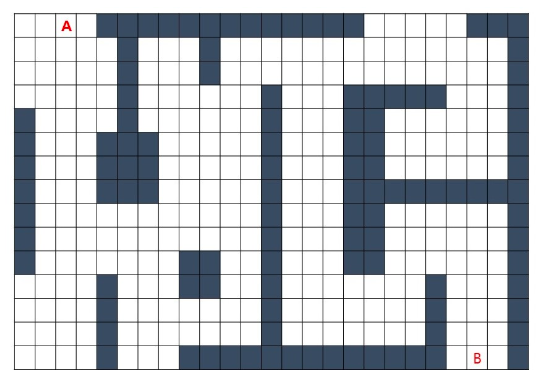

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [4]:
occ_map = np.array([[0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1],
            [0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
            [0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
            [0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1],
            [1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1],
            [1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1],
            [1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1],
            [1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1],
            [1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1],
            [1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1],
            [1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1],
            [0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1],
            [0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1],
            [0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1],
            [0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1]])
    

In [5]:
# Time Complexity는 H에 따라 다르다.
# O(b^d), where d = depth, b = 각 노드의 하위 요소 수
# heapque를 이용하면 길을 출력할 때 reverse를 안해도 됨

class Node:
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

In [6]:

def heuristic(node, goal, D=1, D2=2 ** 0.5):  # Diagonal Distance
    dx = abs(node.position[0] - goal.position[0])
    dy = abs(node.position[1] - goal.position[1])
    return dx + dy
    return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)

In [7]:
def aStar(maze, start, end):
    # startNode와 endNode 초기화
    startNode = Node(None, start)
    endNode = Node(None, end)

    # openList, closedList 초기화
    openList = []
    closedList = []

    # openList에 시작 노드 추가
    openList.append(startNode)

    # endNode를 찾을 때까지 실행
    while openList:
        # 현재 노드 지정
        currentNode = openList[0]
        currentIdx = 0

        # 이미 같은 노드가 openList에 있고, f 값이 더 크면
        # currentNode를 openList안에 있는 값으로 교체
        for index, item in enumerate(openList):
            if item.f < currentNode.f:
                currentNode = item
                currentIdx = index

        # openList에서 제거하고 closedList에 추가
        openList.pop(currentIdx)
        closedList.append(currentNode)

        # 현재 노드가 목적지면 current.position 추가하고
        # current의 부모로 이동
        if currentNode.position == endNode.position:
            path = []
            current = currentNode
            while current is not None:
                # maze 길을 표시하려면 주석 해제
                x, y = current.position
                # maze[x][y] = 7 
                path.append(current.position)
                current = current.parent
            return path[::-1]  # reverse

        children = []
        # 인접한 xy좌표 전부
        for direction in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:

            # 노드 위치 업데이트
            nodePosition = (
                currentNode.position[0] + direction[0],  # X
                currentNode.position[1] + direction[1])  # Y
                
            # 미로 maze index 범위 안에 있어야함
            within_range_criteria = [
                nodePosition[0] > (len(maze) - 1),
                nodePosition[0] < 0,
                nodePosition[1] > (len(maze[len(maze) - 1]) - 1),
                nodePosition[1] < 0,
            ]

            if any(within_range_criteria):  # 하나라도 true면 범위 밖임
                continue

            # 장애물이 있으면 다른 위치 불러오기
            if maze[nodePosition[0]][nodePosition[1]] != 0:
                continue

            new_node = Node(currentNode, nodePosition)
            children.append(new_node)

        # 자식들 모두 loop
        for child in children:

            # 자식이 closedList에 있으면 continue
            if child in closedList:
                continue

            # f, g, h값 업데이트
            if abs(child.position[0] - currentNode.position[0]) + abs(child.position[1] - currentNode.position[1]) == 1:
                child.g = currentNode.g + 1
            else:
                child.g = currentNode.g + 1.4

            # child.h = ((child.position[0] - endNode.position[0]) **
            #            2) + ((child.position[1] - endNode.position[1]) ** 2)
            child.h = heuristic(child, endNode)# 다른 휴리스틱
            # print("position:", child.position) 거리 추정 값 보기
            # print("from child to goal:", child.h)
            
            child.f = child.g + child.h

            # 자식이 openList에 있으고, g값이 더 크면 continue
            if len([openNode for openNode in openList
                    if child == openNode and child.g > openNode.g]) > 0:
                continue
                    
            openList.append(child)

In [8]:
start_coord = (0,2)
end_coord = (14,22)
a_star_grid_path = aStar(occ_map, start_coord, end_coord)
a_star_path = [(j+0.5, i+0.5) for i, j in a_star_grid_path]
print(a_star_path)


[(2.5, 0.5), (3.5, 1.5), (3.5, 2.5), (3.5, 3.5), (3.5, 4.5), (3.5, 5.5), (3.5, 6.5), (3.5, 7.5), (4.5, 8.5), (5.5, 8.5), (6.5, 8.5), (7.5, 7.5), (8.5, 6.5), (9.5, 5.5), (10.5, 4.5), (11.5, 3.5), (12.5, 2.5), (13.5, 3.5), (14.5, 4.5), (15.5, 5.5), (15.5, 6.5), (15.5, 7.5), (15.5, 8.5), (15.5, 9.5), (15.5, 10.5), (16.5, 11.5), (17.5, 11.5), (18.5, 11.5), (19.5, 11.5), (20.5, 10.5), (21.5, 11.5), (22.5, 12.5), (22.5, 13.5), (22.5, 14.5)]


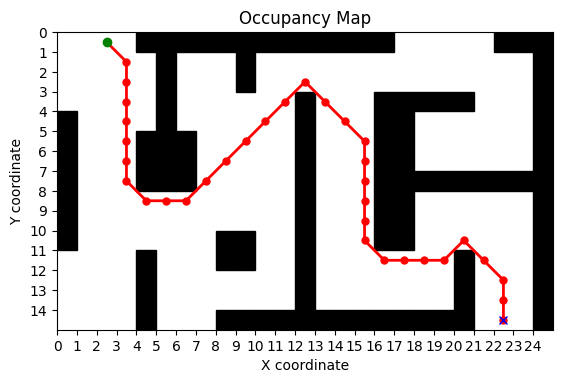

In [9]:
## Plot everything
fig, ax = plt.subplots()
# Create a figure and an axes
ax.set_aspect('equal')
ax.margins(0)
# Display the occupancy grid
for i in range(occ_map.shape[0]):
    for j in range(occ_map.shape[1]):
        if occ_map[i][j] == 1:
            # Adding a rectangle for each occupied cell
            ax.add_patch(patches.Rectangle((j, i), 1, 1, color='black'))
            
path_x = [ix for (ix, iy) in a_star_path]
path_y = [iy for (ix, iy) in a_star_path]

plt.plot(path_x, path_y, 'ro-', linewidth=2, markersize=5, label='Path')  # 'ro-' for red line with circle markers
plt.plot(path_x[0], path_y[0], 'go', label='Start')  # Mark the start with a green circle
plt.plot(path_x[-1], path_y[-1], 'bx', label='Goal')  # Mark the end with a blue 'x'

# Adding labels and a title for clarity
ax.set_title('Occupancy Map')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

ax.set_xticks(np.arange(0, occ_map.shape[1], 1))
ax.set_yticks(np.arange(0, occ_map.shape[0], 1))
ax.invert_yaxis()  # Invert the y-axis so that the first row of the grid is at the top
# Show the plot

plt.show()